In [5]:
pip install z3-solver


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 MB 15.2 MB/s eta 0:00:00


In [7]:
from z3 import Solver, Int, sat

def simple_problem():

    solver = Solver()

    x = Int('x')
    y = Int('y')

    solver.add(x > 10, y == x + 2)

    if solver.check() == sat:
        print("Satisfiable")
        print(solver.model())
    else:
        print("Unsatisfiable")

simple_problem()


Satisfiable
[y = 13, x = 11]


In [8]:
from z3 import Solver, sat

def solve_smt_file(file_path):
    solver = Solver()

    solver.from_file(file_path)

    if solver.check() == sat:
        print(f"Satisfiable: {file_path}")
        print(solver.model())
    else:
        print(f"Unsatisfiable: {file_path}")

solve_smt_file('/content/drive/MyDrive/20190429-UltimateAutomizerSvcomp2019/alternating_list_true-unreach-call_true-valid-memsafety.i_0.smt2')


Satisfiable: /content/drive/MyDrive/20190429-UltimateAutomizerSvcomp2019/alternating_list_true-unreach-call_true-valid-memsafety.i_0.smt2
[c_main_~a~0.offset = 0,
 c_main_~p~0.base = 0,
 c_main_~a~0.base = 4,
 c_#memory_int = Store(Store(K(BitVec(32), K(BitVec(32), 4)),
                             4,
                             Store(K(BitVec(32), 4), 0, 0)),
                       0,
                       K(BitVec(32), 0)),
 c_#valid = K(BitVec(32), True),
 c_main_~p~0.offset = 4294967292,
 ~unnamed0~0~P_PGID = 2,
 ~unnamed0~0~P_ALL = 0,
 ~unnamed0~0~P_PID = 1]


Solved splice_true-unreach-call_false-valid-memtrack.i_4.smt2 in 145.2797 seconds.
Solved splice_true-unreach-call_false-valid-memtrack.i_5.smt2 in 0.1497 seconds.
Solved splice_true-unreach-call_false-valid-memtrack.i_6.smt2 in 0.1837 seconds.
Solved splice_true-unreach-call_false-valid-memtrack.i_7.smt2 in 185.3870 seconds.
Solved splice_true-unreach-call_false-valid-memtrack.i_8.smt2 in 9.3454 seconds.
Solved splice_true-unreach-call_false-valid-memtrack.i_9.smt2 in 104.2291 seconds.
Solved standard_running_true-unreach-call.i_1.smt2 in 0.0289 seconds.
Solved standard_running_true-unreach-call.i_11.smt2 in 116.9130 seconds.
Solved standard_running_true-unreach-call.i_12.smt2 in 123.6915 seconds.
Solved standard_running_true-unreach-call.i_13.smt2 in 48.3461 seconds.
Solved standard_running_true-unreach-call.i_14.smt2 in 3.7213 seconds.
Solved standard_running_true-unreach-call.i_2.smt2 in 0.1714 seconds.
Solved standard_running_true-unreach-call.i_3.smt2 in 0.2327 seconds.
Solved st

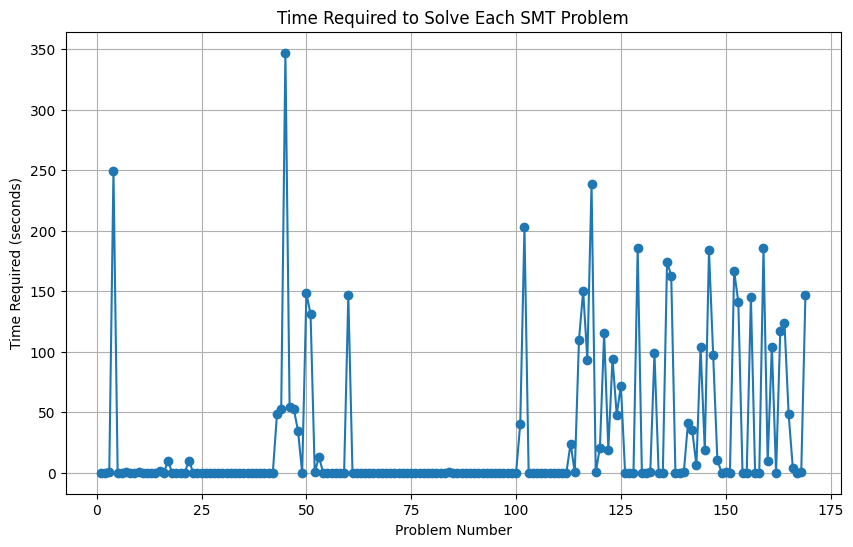

In [12]:
import os
import time
import matplotlib.pyplot as plt
from z3 import Solver, parse_smt2_file, sat

smt_dir = '/content/drive/MyDrive/20190429-UltimateAutomizerSvcomp2019'

def solve_smt_files(smt_dir):
    times = []
    files = sorted(os.listdir(smt_dir))

    for file in files:
        if file.endswith('.smt2'):
            file_path = os.path.join(smt_dir, file)
            solver = Solver()

            start_time = time.time()
            solver.from_file(file_path)
            solver.check()
            end_time = time.time()

            solving_time = end_time - start_time
            times.append(solving_time)
            print(f"Solved {file} in {solving_time:.4f} seconds.")

    return times

def plot_solving_times(times):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(times) + 1), times, marker='o', linestyle='-')
    plt.xlabel('Problem Number')
    plt.ylabel('Time Required (seconds)')
    plt.title('Time Required to Solve Each SMT Problem')
    plt.grid(True)
    plt.show()

solving_times = solve_smt_files(smt_dir)
plot_solving_times(solving_times)


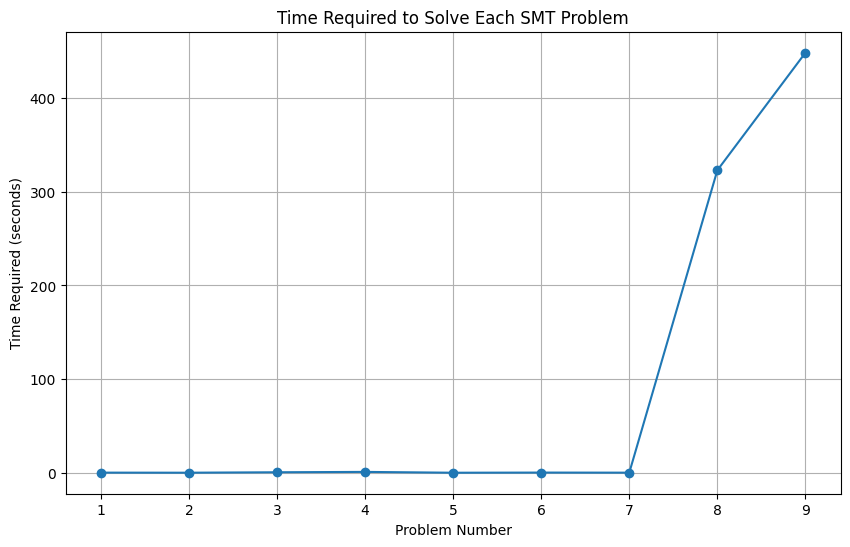

In [13]:
import os
import time
import matplotlib.pyplot as plt
from z3 import Solver, parse_smt2_file, sat


smt_dir = '/content/drive/MyDrive/201903-Zohar-alive'

def solve_smt_files(smt_dir):
    times = []
    files = sorted(os.listdir(smt_dir))

    for file in files:
        if file.endswith('.smt2'):
            file_path = os.path.join(smt_dir, file)
            solver = Solver()

            start_time = time.time()
            solver.from_file(file_path)
            solver.check()
            end_time = time.time()

            solving_time = end_time - start_time
            times.append(solving_time)

    return times

def plot_solving_times(times):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(times) + 1), times, marker='o', linestyle='-')
    plt.xlabel('Problem Number')
    plt.ylabel('Time Required (seconds)')
    plt.title('Time Required to Solve Each SMT Problem')
    plt.grid(True)
    plt.show()

solving_times = solve_smt_files(smt_dir)
plot_solving_times(solving_times)
